In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/Users/burakfindikli/Documents/Mackolik/data/2018-2019_tsl.csv',index_col = False)
df2=pd.read_csv('/Users/burakfindikli/Documents/Mackolik/data/2017-2018_tsl.csv',index_col = False)

In [2]:
 #  2017-2018 ile 2018-2019 sezonunun Maçlarını birleştirdim
 df3=pd.concat([df, df2], ignore_index=True)

In [3]:
#Maçı ev sahibi kazandıysa 1 beraberlik olduysa 0 deplasman takımı kazandıysa 2 diye kodladım.
df3["kazanan_dep"]=df3.ev_sonuc < df3.dep_sonuc
df3.kazanan_dep = df3.kazanan_dep.astype(int)*2

df3["kazanan_ev"] = df3.ev_sonuc > df3.dep_sonuc
df3.kazanan_ev = df3.kazanan_ev.astype(int)

df3["kazanan_berabere"] = df3.ev_sonuc == df3.dep_sonuc
df3.kazanan_berabere = df3.kazanan_berabere.astype(int)*0

df3["sonuc"]=df3.kazanan_dep+df3.kazanan_ev+df3.kazanan_berabere
df3=df3.drop(['kazanan_dep', 'kazanan_ev','kazanan_berabere'], axis=1)


In [4]:
#bu değişkenlerde % ve , var temizleme yapmam lazım
col=['ev_topla_oynama','ev_ikili_mucadele_kazanma','ev_hava_topu','dep_topla_oynama','dep_ikili_mucadele_kazanma','dep_hava_topu','ev_pas_isabet','ev_rakip_yari_sahada_pas_isabeti','ev_orta_istabeti','dep_pas_isabet','dep_rakip_yari_sahada_pas_isabeti','dep_orta_istabeti','ev_sut_isabeti','dep_sut_isabeti','ev_top_kapma_basarisi','dep_top_kapma_basarisi']

In [5]:
# col değişkenindeki % , gibi karakterleri replace ettim
k=0
while k < df3[col].shape[1]:
    df3[col[k]] = df3[col[k]].str.replace(",",".")
    df3[col[k]] = df3[col[k]].str.replace("%","")
    k+=1

In [6]:
#object olan veri tiplerini floata çevirdim
df3[col]=df3[col].astype(float)

In [7]:
# verinin genel özelliklerine baktım
df3.describe()

,ev_sonuc,dep_sonuc,ev_topla_oynama,ev_ikili_mucadele_kazanma,ev_hava_topu,ev_pas_arasi,ev_ofsayt,ev_korner,dep_topla_oynama,dep_ikili_mucadele_kazanma,...,dep_top_kapma,dep_top_kapma_basarisi,dep_uzaklastirma,ev_faul,ev_sari_kart,ev_kirmizi_kart,dep_faul,dep_sari_kart,dep_kirmizi_kart,sonuc
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,...,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,1.591919,1.208754,51.518788,50.395017,50.837912,14.303030,2.099663,5.334007,48.481212,49.605051,...,17.323906,69.365657,22.401347,15.222222,2.181818,0.125253,15.096296,2.338721,0.147475,1.039057
std,1.289785,1.170529,9.616395,5.234854,10.612499,5.741373,1.611375,2.926818,9.616395,5.234500,...,5.193896,13.081705,9.608818,4.156042,1.350080,0.350878,4.430599,1.401920,0.414286,0.726721
min,0.000000,0.000000,24.400000,31.000000,13.000000,1.000000,0.000000,0.000000,24.600000,33.300000,...,4.000000,25.000000,3.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,44.800000,46.600000,43.800000,10.000000,1.000000,3.000000,41.100000,45.900000,...,14.000000,60.000000,16.000000,12.000000,1.000000,0.000000,12.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,51.800000,50.400000,50.000000,14.000000,2.000000,5.000000,48.200000,49.600000,...,17.000000,70.000000,21.000000,15.000000,2.000000,0.000000,15.000000,2.000000,0.000000,1.000000
75%,2.000000,2.000000,58.900000,54.100000,57.900000,18.000000,3.000000,7.000000,55.200000,53.400000,...,21.000000,78.600000,28.000000,18.000000,3.000000,0.000000,18.000000,3.000000,0.000000,2.000000
max,7.000000,7.000000,75.400000,66.700000,87.500000,42.000000,9.000000,19.000000,75.600000,69.000000,...,38.000000,100.000000,59.000000,32.000000,8.000000,2.000000,31.000000,7.000000,4.000000,2.000000


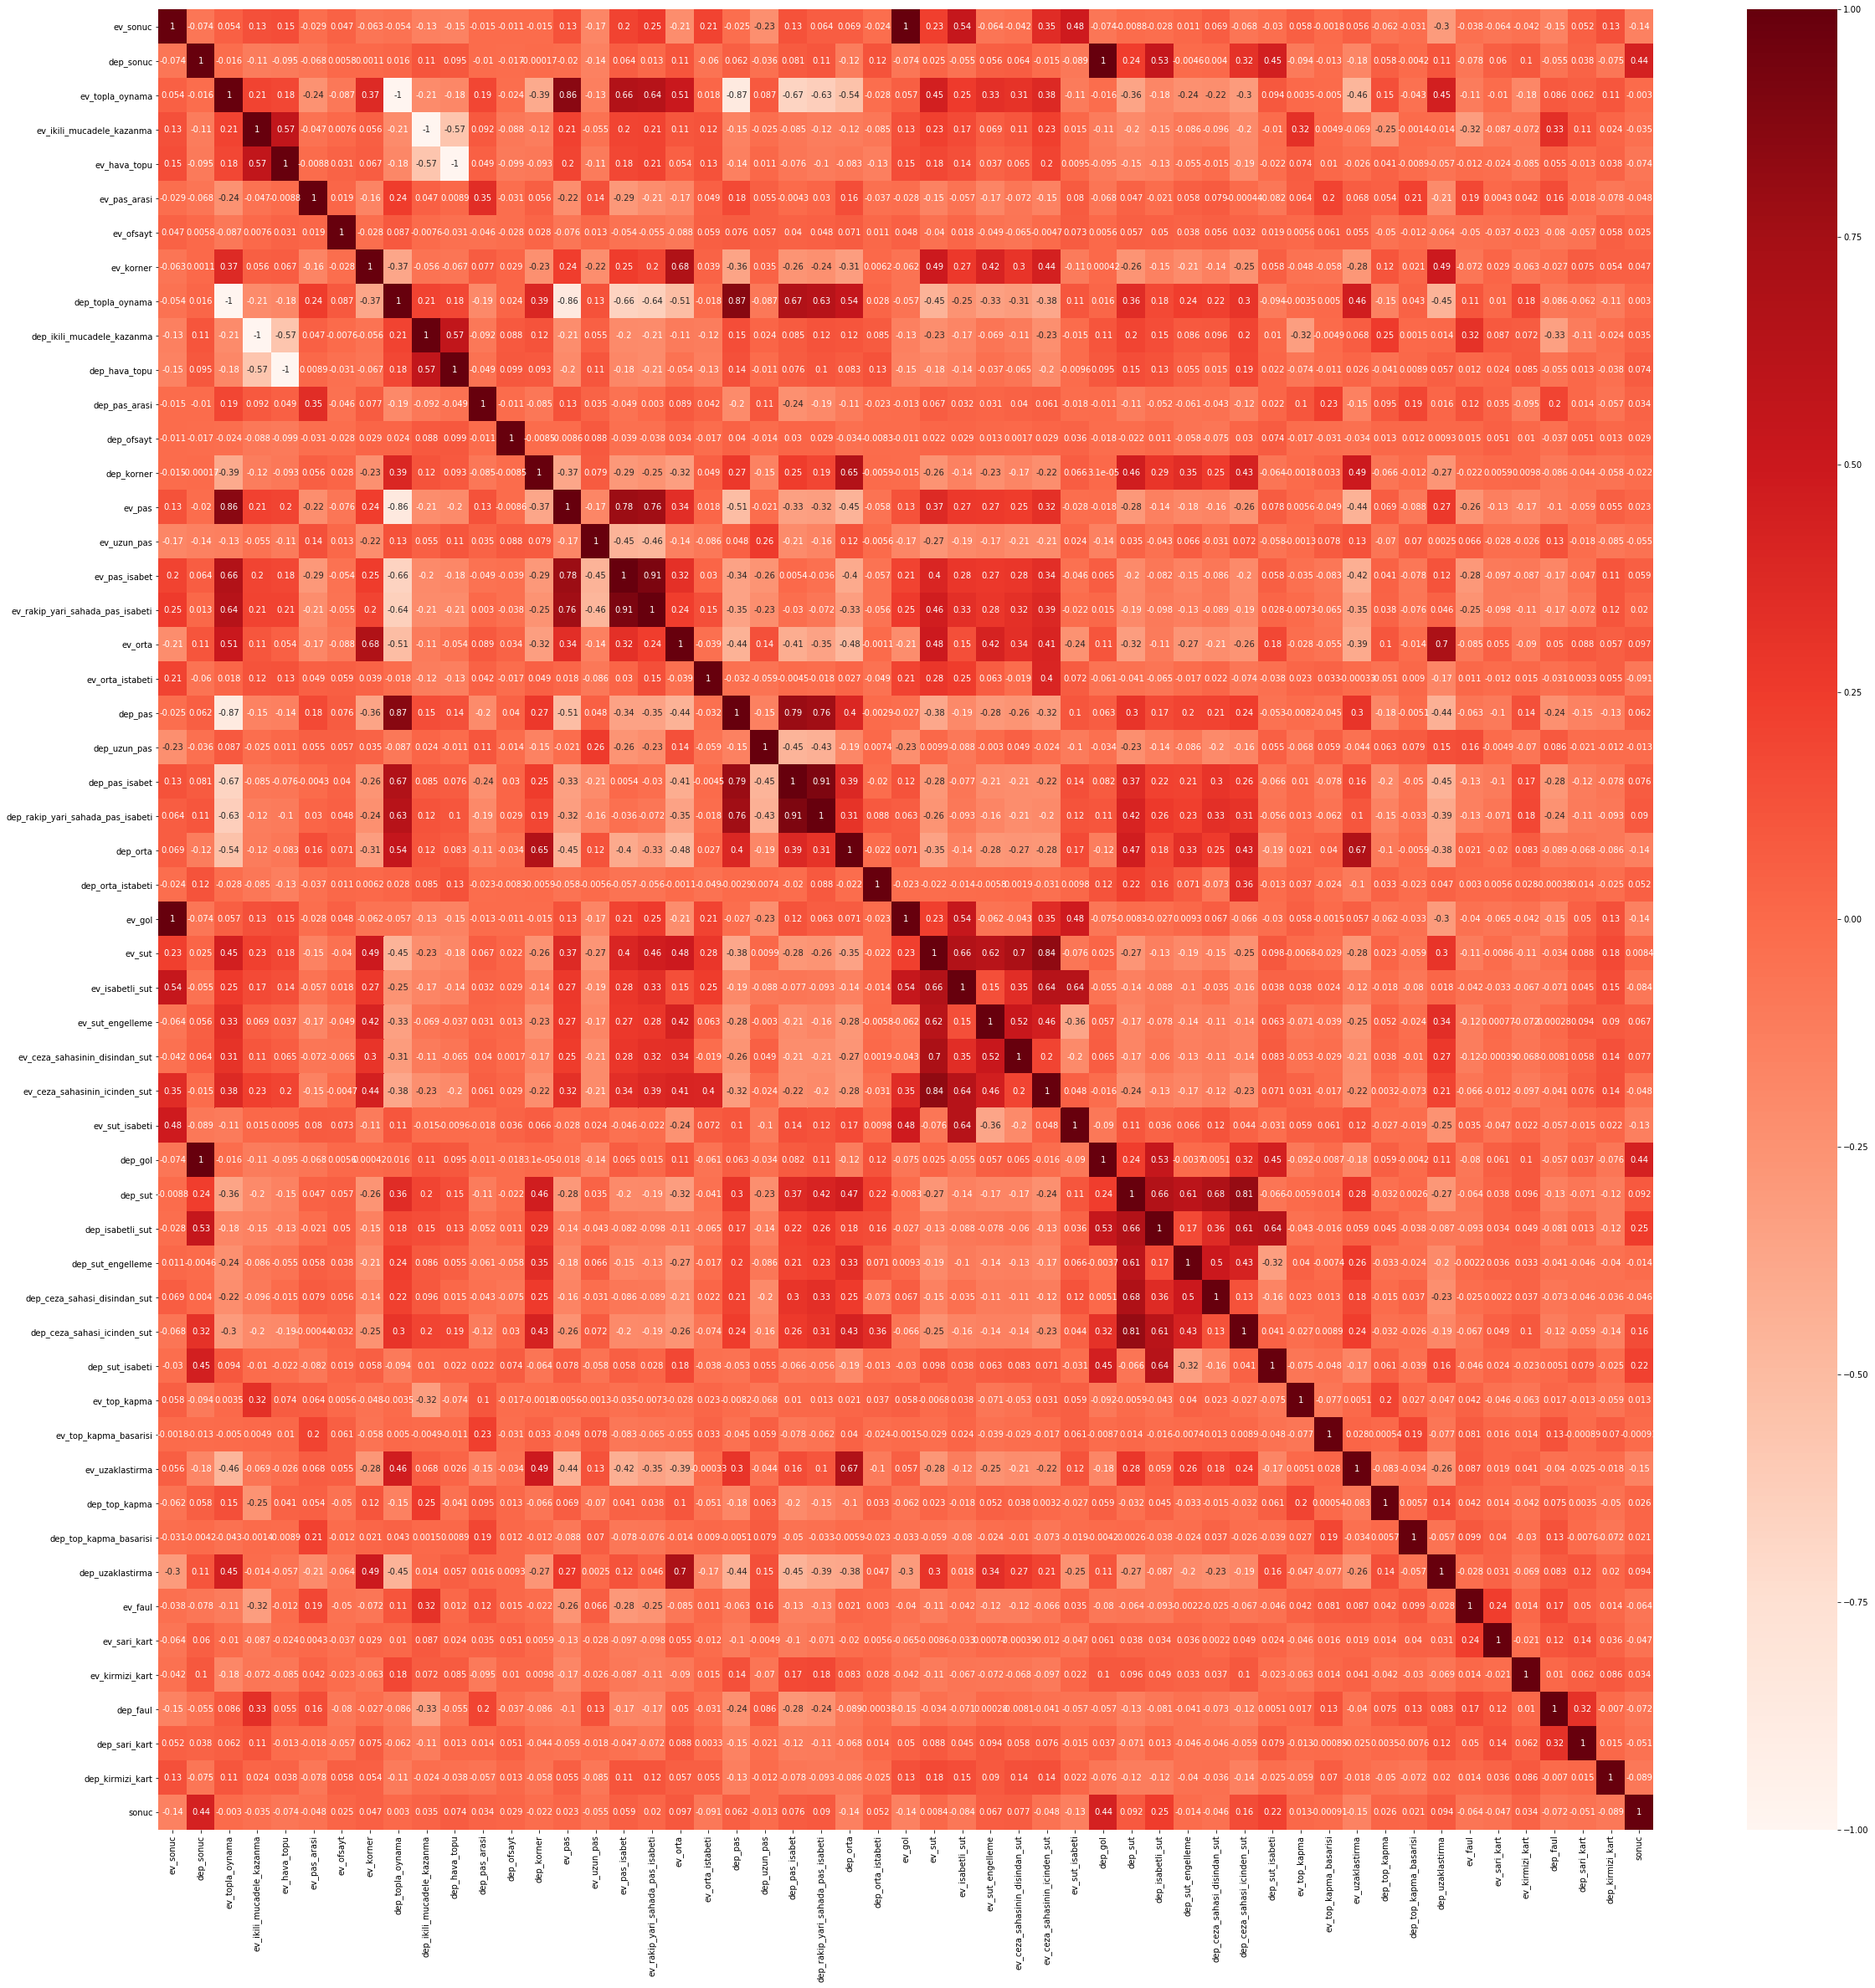

In [8]:
#corelasyon matrisini çizdirdim
plt.figure(figsize=(40,40))
cor = df3.corr()
sns_heat=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
fig=sns_heat.get_figure
plt.show()

In [9]:
#bağımlı bağımsız değişkenlerimi ayırdım 
#bağımlı değişken sonuc(1=Evsahibi kazanır 0=Beraberlik 2=Deplasman kazanır)
bagimli = df3.iloc[:,-1:]
bagimsiz = df3.iloc[:,2:]

In [10]:

#veri setini eğitim ve test olarak ayırdım
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bagimsiz,bagimli,test_size=0.25,random_state=1)
#veriyi standartlaştırdım
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
#eğitim setinin standartlıştırılması
x_train_std = stdsc.fit_transform(x_train)
#test setinin standartlaştırılması
x_test_std = stdsc.transform(x_test) 


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
knn.fit(x_train,y_train)
result = knn.predict(x_test)

In [12]:
# Karmaşıklık matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,result)
print(cm)

[[ 36  33  12]
 [ 36 135  12]
 [ 30  26  52]]


In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, result)
print(accuracy)

0.5994623655913979


In [ ]:
""" accuracy %60 yani elimizde verilerle ancak %60 oranında doğru maç sonucu tahmin edilebiliyor Aslına bakarsak bir takımın maçı kazanmasındaki en büyük etkilerden bazıları hangi futbolcular maçta oynuyor, sakat olan futbolcular , futbolcuların maç öncesi moral ve motivasyonu gibi verilerde işin içine katıldığında daha iyi bir tahmin yapılabileceği konusunda fikrimdir.